In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/usuario/Desktop/archivos_base_python_data_science_big_data_esencial/basedatos2008.csv")

In [4]:
df = df.dropna(subset = ["ArrDelay"]) # elimino los datos faltantes de la variable
df = df.sample(frac=1).head(100000) # mesclamos
Y = df["ArrDelay"] # retraso llegada
X = df[["DepDelay"]] # retraso salida
# predeciremos el reraso en la llegada en funcion de la salida 

In [5]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
regr = linear_model.LinearRegression() # ajustamos el modelo con estas instrucciones
regr.fit(X,Y) # ajustarlo a X e Y 

print("Coeficientes: ", regr.coef_ ) # nos imprimira el valor de las Betas - en este caso solo 1 
Y_pred = regr.predict(X) # econtrar las preddicones 
print("R cuadrado: ",r2_score(Y, Y_pred)) # esto nos dira que tan bueno es el morelo R2

Coeficientes:  [1.02250154]
R cuadrado:  0.876228937283962


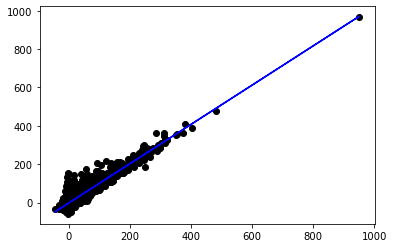

In [9]:
plt.scatter(X[1:10000], Y[1:10000], color = "black") #puntos
plt.plot(X[1:10000], Y_pred[1:10000],color = "Blue") # recta de regresión
plt.show() # muesta el grafico


In [12]:
# Ajustar el modelo con variables Categoricas - X categoricas 

X = df[["AirTime","Distance","TaxiIn","TaxiOut"]]

#convertimos los valoes a cadena , transformamos numeros a texto
df["Month"] = df["Month"].apply(str) 
df["DayofMonth"] = df["DayofMonth"].apply(str) 
df["DayOfWeek"] = df["DayOfWeek"].apply(str) 

dummies = pd.get_dummies(data=df[["Month","DayofMonth","DayOfWeek","Origin","Dest"]])
X = dummies.add(X, fill_value=0)

In [13]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_TYS', 'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=615)

In [14]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

#print(coeficientes: ", regre.coef)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

R cuadrado:  0.1945522453623244


In [15]:
X = X.add(df[["DepDelay"]],fill_value=0) # añadimos esta columna a las variables anteriores

In [16]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

#print(coeficientes: ", regre.coef)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

R cuadrado:  0.9782680763675425
